In [4]:
# !pip install magenta
# !source activate magenta

# will be needed some dirs
# !mkdir checkpoints

In [5]:
from __future__ import absolute_import
from __future__ import division

import matplotlib.pyplot as plt
%matplotlib inline

import ast
import os
import numpy as np
import random
import tensorflow as tf
import urllib2

from magenta.models.image_stylization import image_utils
from magenta.models.image_stylization import model

Couldn't import dot_parser, loading of dot files will not be possible.


In [10]:
def DownloadCheckpointFiles(checkpoint_dir='checkpoints'):
    """Download checkpoint files if necessary."""
    url_prefix = 'http://download.magenta.tensorflow.org/models/' 
    checkpoints = ['multistyle-pastiche-generator-monet.ckpt', 
                   'multistyle-pastiche-generator-varied.ckpt']
    for checkpoint in checkpoints:
        full_checkpoint = os.path.join(checkpoint_dir, checkpoint)
        if not os.path.exists(full_checkpoint):
            print 'Downloading', full_checkpoint
            response = urllib2.urlopen(url_prefix + checkpoint)
            data = response.read()
            with open(full_checkpoint, 'wb') as fh:
                fh.write(data)
DownloadCheckpointFiles()

In [13]:
# Select an image (any jpg or png).
#input_image = 'evaluation_images/guerrillero_heroico.jpg'
input_image = '/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/magenta/models/image_stylization/evaluation_images/guerrillero_heroico.jpg'
image = np.expand_dims(image_utils.load_np_image(
          os.path.expanduser(input_image)), 0)

In [32]:
image.shape

(1, 512, 770, 3)

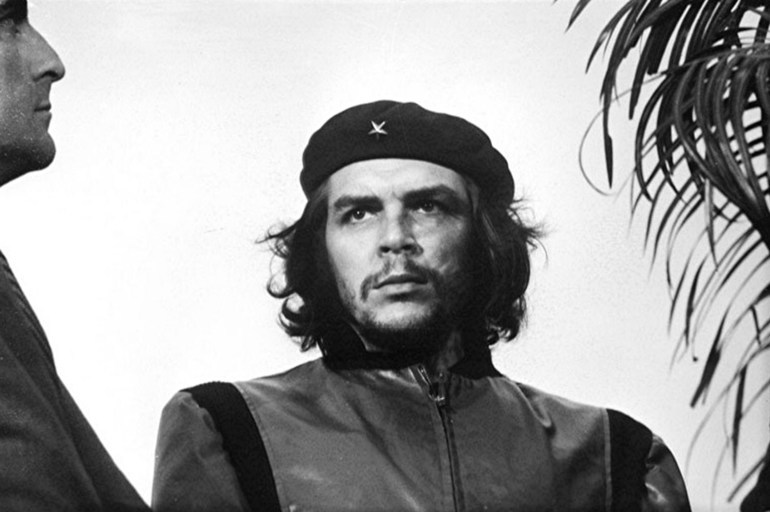

In [29]:
from IPython.display import Image, display
display(Image(filename=input_image))

In [17]:
# Select a demo ('varied' or 'monet')
demo = 'varied'

In [18]:
if demo == 'monet':
    checkpoint = 'checkpoints/multistyle-pastiche-generator-monet.ckpt'
    num_styles = 10  # Number of images in checkpoint file. Do not change.
elif demo == 'varied':
    checkpoint = 'checkpoints/multistyle-pastiche-generator-varied.ckpt'
    num_styles = 32  # Number of images in checkpoint file. Do not change.
    
# Styles from checkpoint file to render. They are done in batch, so the more 
# rendered, the longer it will take and the more memory will be used.
# These can be modified as you like. Here we randomly select six styles.
styles = range(num_styles)
random.shuffle(styles)
which_styles = styles[0:6]
num_rendered = len(which_styles)  

[15 29  7  3 13  1]
INFO:tensorflow:Restoring parameters from checkpoints/multistyle-pastiche-generator-varied.ckpt
[[[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]

 [[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]

 [[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]

 ..., 
 [[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]

 [[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]

 [[ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]
  ..., 
  [ nan  nan  nan]
  [ nan  nan  nan]
  [ nan  nan  nan]]]


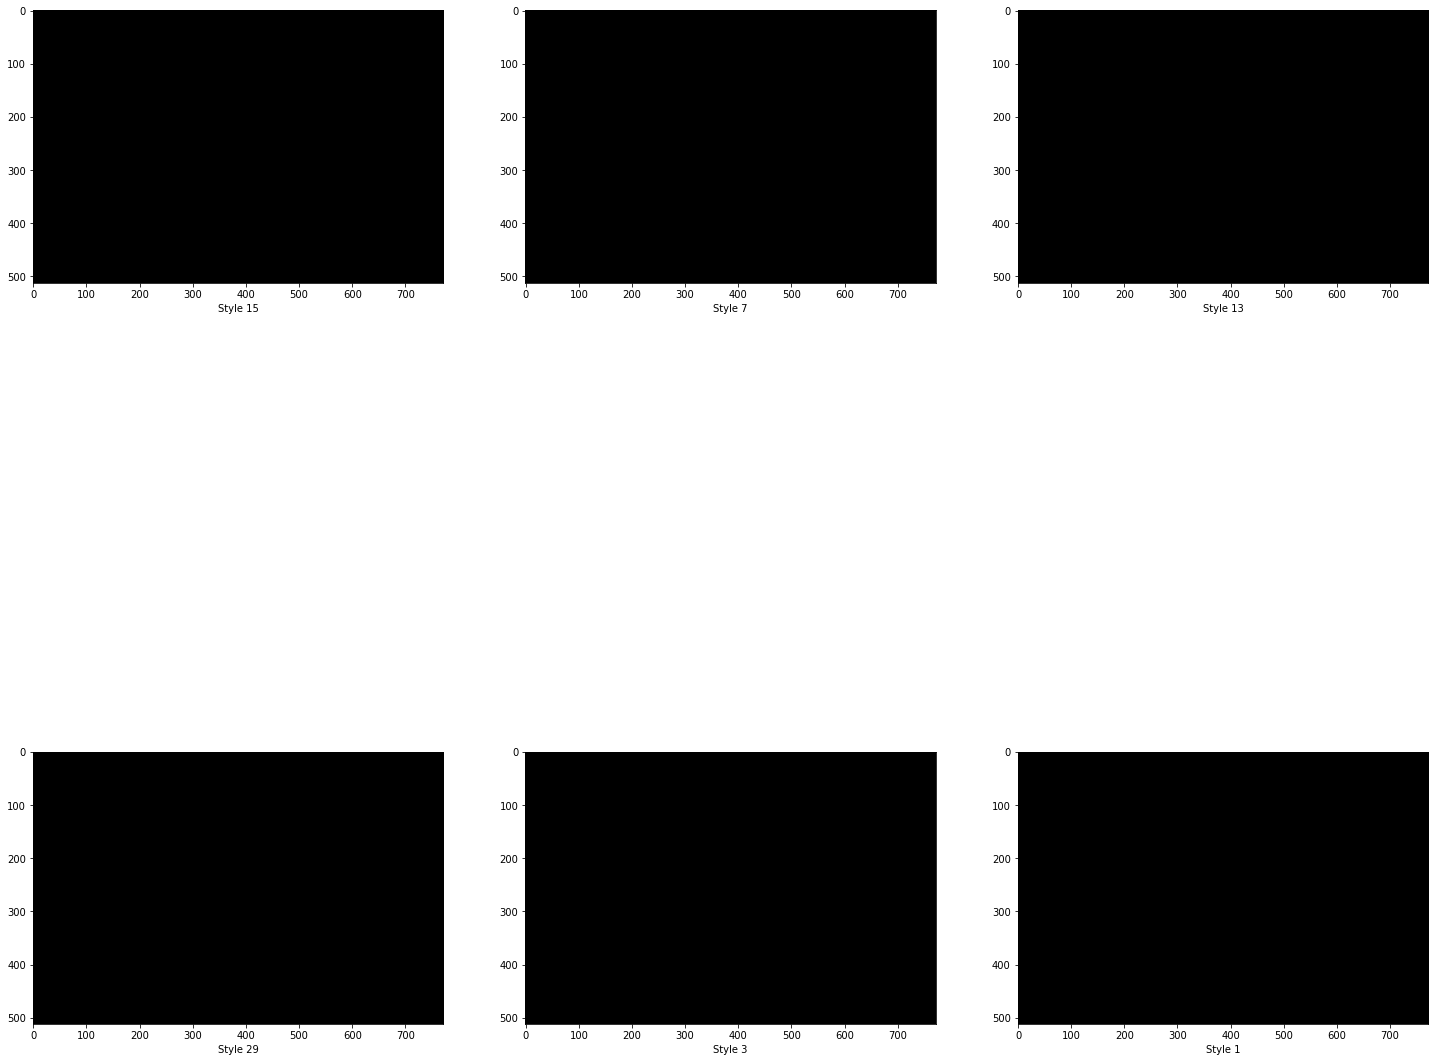

In [40]:
with tf.Graph().as_default(), tf.Session() as sess:

    print tf.constant(which_styles).eval()

    stylized_images = model.transform(
        tf.concat([image for _ in range(len(which_styles))], 0),
        normalizer_params={
            'labels': tf.constant(which_styles),
            'num_categories': num_styles,
            'center': True,
            'scale': True})
    model_saver = tf.train.Saver(tf.global_variables())
    model_saver.restore(sess, checkpoint)
    stylized_images = stylized_images.eval()
    print stylized_images[0]
    
    # Plot the images.
    counter = 0
    num_cols = 3
    f, axarr = plt.subplots(num_rendered // num_cols, num_cols, figsize=(25, 25))
    for col in range(num_cols):
        for row in range( num_rendered // num_cols):
            axarr[row, col].imshow(stylized_images[counter])
            axarr[row, col].set_xlabel('Style %i' % which_styles[counter])
            counter += 1